### PCA run on the Load_Diabetes dataset from scikit-learn

- Importing the libraries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [5]:
diabetes = load_diabetes()

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
df = pd.DataFrame(diabetes["data"],columns=diabetes["feature_names"])

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- Reducing columns for more accurate results

<Axes: >

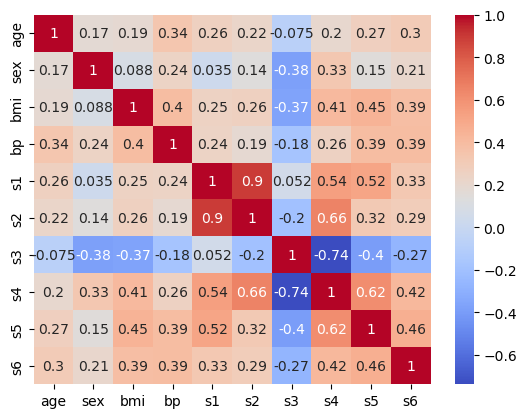

In [9]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

>**s1*,*s2* and *s4* stand out the most since their correlation is high*

In [10]:
df.drop(columns=["age","sex","bmi","bp","s3","s5","s6"], inplace=True)